<a href="https://colab.research.google.com/github/Neoneto/Diamond_Analysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Anlaysis
The new Dataset was explored. Further data processing was also made when necessary for this part but changes were not saved in the CSV file. Data visualizations were also made to relay some of the information.

# Importing Libraries and the dataset

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Coding Dojo/Diamonds/diamonds_preprocessed.csv'                
pre_processed = pd.read_csv(path)    

pre_processed.head()

Mounted at /content/drive


,Id,Shape,Weight,Clarity,color_grade,Cut,Polish,Symmetry,Fluorescence,Price,max_width,min_width,depth,price_per_carat
0,1638147,CUSHION,0.55,SI2,E,EX,EX,VG,N,1378.65,5.05,4.35,2.94,2506.636364
1,1630155,CUSHION,0.50,VVS1,FANCY,EX,EX,VG,F,1379.74,4.60,4.31,2.92,2759.480000
2,1612606,CUSHION,0.51,VS2,H,EX,EX,VG,N,1380.19,4.71,4.35,2.94,2706.254902
3,1638140,CUSHION,0.50,VS2,H,EX,EX,VG,N,1380.61,4.91,4.26,2.88,2761.220000
4,1536093,CUSHION,0.53,SI1,D,EX,VG,VG,N,1383.13,4.70,4.46,3.01,2609.679245


# Data Distribution
Check the distribution of all the columns using histograms for numerical data and bar charts for categorical data.

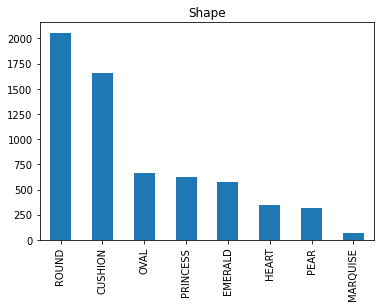

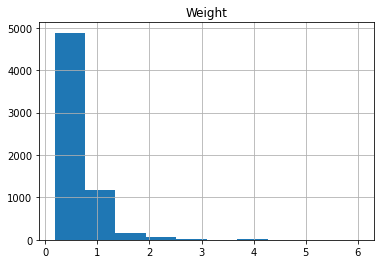

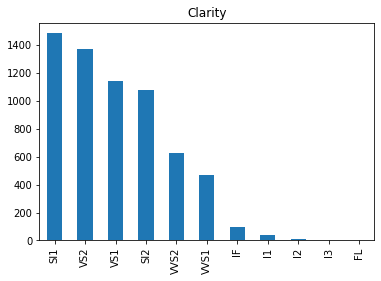

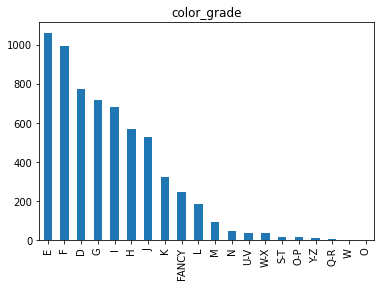

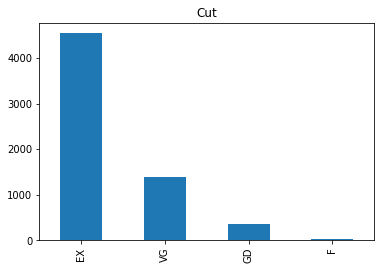

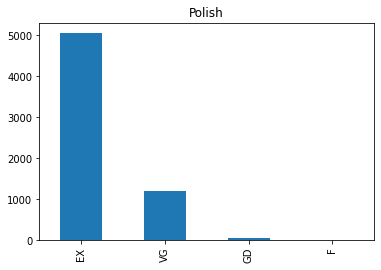

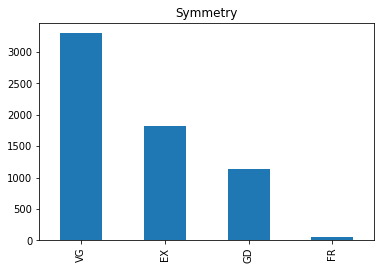

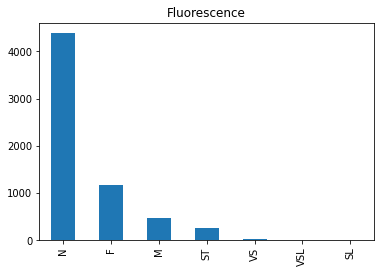

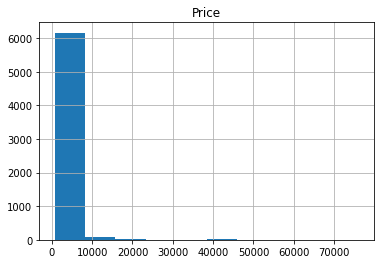

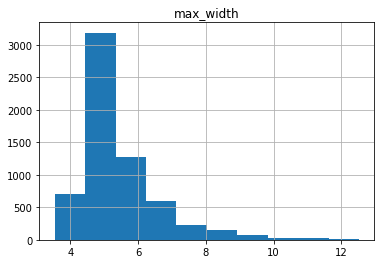

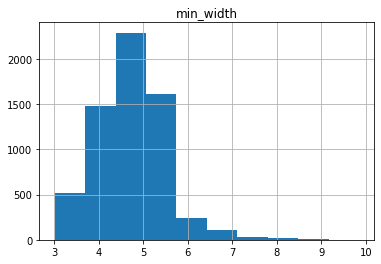

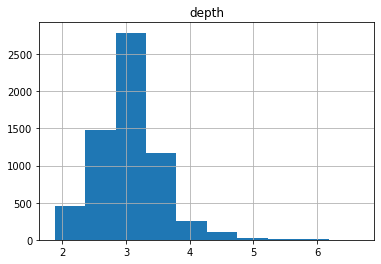

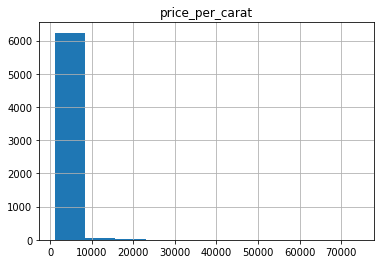

In [ ]:
# Visualize the distribution of the columns
# histogram for numerical data
# bar graph for categorical data

for c_name in pre_processed.columns[1:]:
  if pre_processed[c_name].dtype == 'O':
    plt.figure()
    pre_processed[c_name].value_counts().plot(kind='bar');
    plt.title(c_name)
  else:
    plt.figure()
    pre_processed[c_name].hist()
    plt.title(c_name)
    



For some properties of diamonds, such as color grade, the grade 'Fancy' is the most desirable followed by 'D' and the least is 'Z'. This will be considered in encoding some of the columns.

# Manual Encoding of Categorical Columns
Properties of diamonds, despite being categorical and discrete have grade scale. To retain the information on the scale, these properties are manually encoded using disctionaries based on the actual scale. Least desirable properties are assigned a value of 0 and increases by 1 as the grade increases. The most desireable having the highest integer value. 

In [ ]:
# Ranking for some properties
# From least to most desirable

'''
Clarity grades
I = included
SI = slightly included
VS = Very slightly included
VVS = very very slightly included
IF = internally flawless
'''
clarity_order = ['I3','I2','I1','SI2','SI1','VS2', 'VS1','VVS2',   'VVS1',    'IF',  'FL']


'''
Fluorescence grade
N = None
F - faint
M - Medium
S - Strong
VS = Very strong

'''
fluoro_order = [ 'SL','VSL','VS','ST','M','F','N',     ]


'''
Cut scale
F = fair
GD = good
VG = very good
EX = excellent 
'''
cut_order = ['F', 'GD', 'VG', 'EX']

'''
Symmetry scale
FR = fair
GD = good
VG = very good
EX = excellent 
'''
symm_order = ['FR', 'GD', 'VG', 'EX']

'''
Polish scale
F = fair
GD = good
VG = very good
EX = excellent 
'''
polish_order = ['F', 'GD', 'VG', 'EX']

In [ ]:
# Copy the dataframe and encode the categorical columns

encoded = pre_processed.drop(columns = 'Id').copy()

color_scale = {'Y-Z': 0,
               'W-X': 1,
               'W': 1,
               'U-V': 2,
               'S-T': 3,
               'Q-R': 4,
               'O-P': 5,
               'O': 5,
               'N': 6,
               'M': 7,
               'L': 8,
               'K': 9,
               'J': 10,
               'I': 11,
               'H': 12,
               'G': 13,
               'F': 14,
               'E': 15,
               'D': 16,
               'FANCY': 17}

# Encode the color grade column according to the scale
encoded.color_grade.replace(color_scale, inplace = True)

# According to clarity scale
temp_index = np.arange(len(clarity_order))
temp_dict = dict(zip(clarity_order, temp_index))
encoded.Clarity.replace(temp_dict, inplace = True)

# According to Fluorescence scale
temp_index = np.arange(len(fluoro_order))
temp_dict = dict(zip(fluoro_order, temp_index))
encoded.Fluorescence.replace(temp_dict, inplace = True)

# According to cut scale
temp_index = np.arange(len(cut_order))
temp_dict = dict(zip(cut_order, temp_index))
encoded.Cut.replace(temp_dict, inplace = True)

# According to symmetry scale
temp_index = np.arange(len(symm_order))
temp_dict = dict(zip(symm_order, temp_index))
encoded.Symmetry.replace(temp_dict, inplace = True)

# According to cut scale
temp_index = np.arange(len(polish_order))
temp_dict = dict(zip(polish_order, temp_index))
encoded.Polish.replace(temp_dict, inplace = True)


for c_name in encoded.columns:
  if encoded[c_name].dtypes == 'O':
    categories = encoded[c_name].unique()
    codes = np.arange(len(categories))
    temp_dict = dict(zip(categories, codes))

    encoded[c_name].replace(temp_dict, inplace = True)

    # Print the mapping used, for tracking
    print(c_name)
    print(temp_dict)



Shape
{'CUSHION': 0, 'HEART': 1, 'MARQUISE': 2, 'OVAL': 3, 'PEAR': 4, 'PRINCESS': 5, 'EMERALD': 6, 'ROUND': 7}


In [ ]:
#encoded0 = encoded.copy()

#encoded = encoded.loc[encoded.price_per_carat < encoded.price_per_carat.quantile(0.99)]

# Column of Correlation
Because of the previous encoding, the correlation, even between categorical columns can be calculated and because the grade scale is retained, the correlation coefficients hold information.

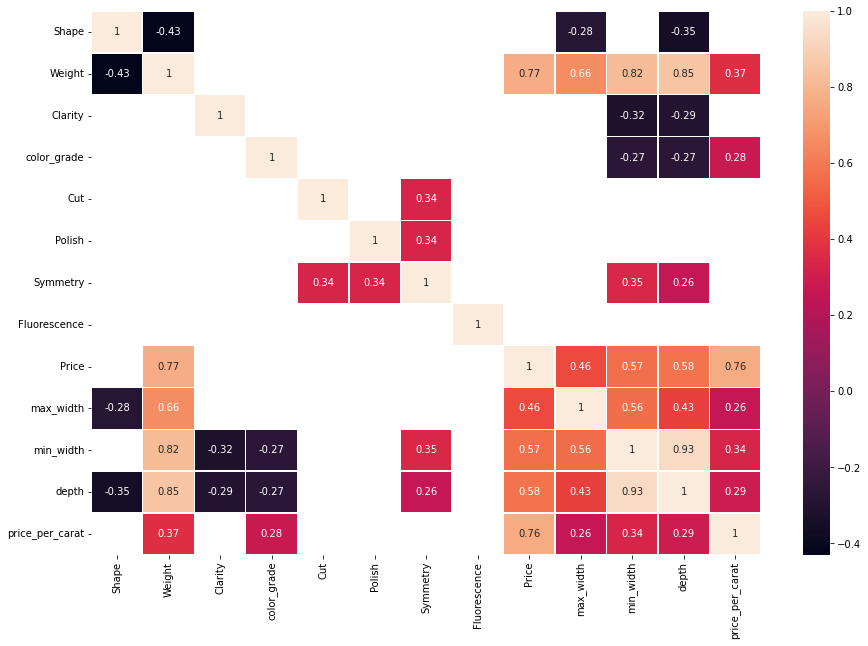

In [ ]:
# Display heatmap for strong correlations
# Mask weak correlations
corr = encoded.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, mask = (abs(corr) < 0.25), linewidths=0.3)

From the heatmap, we can see that the weight is strongly correlated to the dimensions of the diamond however, since diamonds have the same composition with small differences in impurities, they should have similar densities and this correlation should be expected and doesn't tell us anything insightful.\
The weight is also correlated to the price which is also not surprising.

# Data Explanatory Visualizations
Create insightful visualizations from the exploratory analysis performed above.

## Dimensions and Total Price Scatter Plot

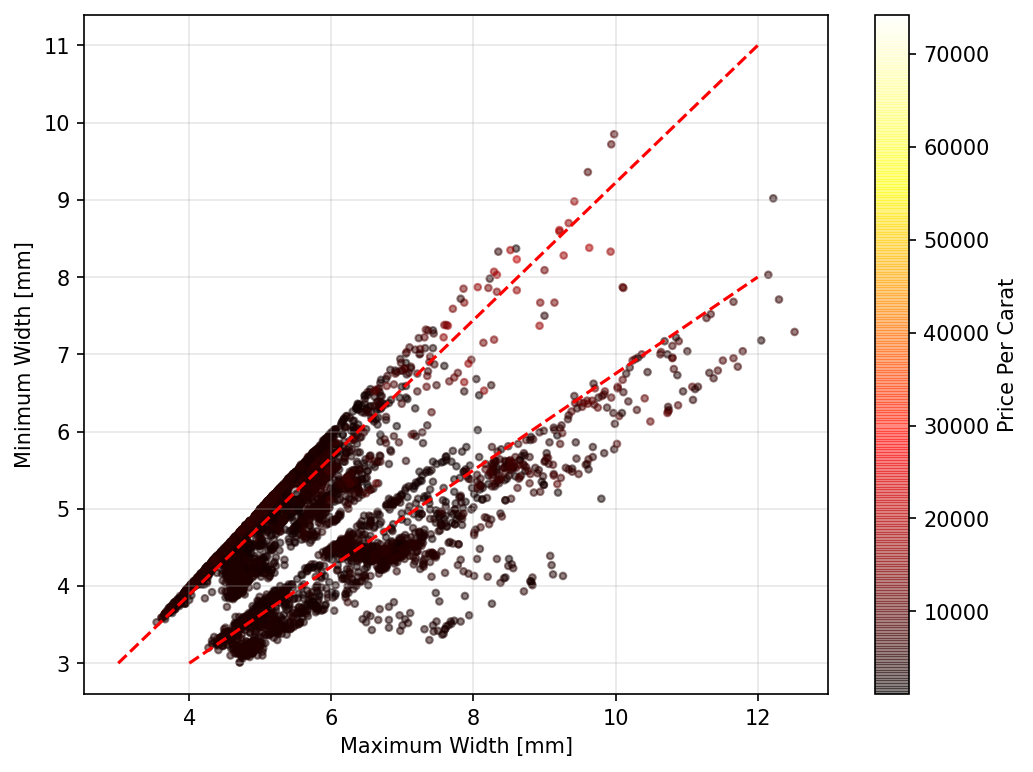

In [ ]:
# Define the data to be used
x = encoded.max_width
y = encoded.min_width
z = encoded.depth
c = encoded.price_per_carat

# Initialize the plot
plt.figure(figsize = (8,6), dpi = 150)

# Create the plot
plt.scatter(x,y,c = c, cmap = 'hot', s = 10, alpha = 0.5)

# Display the two general trends
# Obtained by eyeballing
plt.plot([3,12], [3,11], linestyle = '--', c = 'r')
plt.plot([4,12], [3,8], linestyle = '--', c = 'r')

# Groom the plot
plt.colorbar(label = 'Price Per Carat')
plt.xlabel('Maximum Width [mm]' )
plt.ylabel('Minimum Width [mm]' )
plt.grid(alpha = 0.3)


## Dimensions and Price per Carat

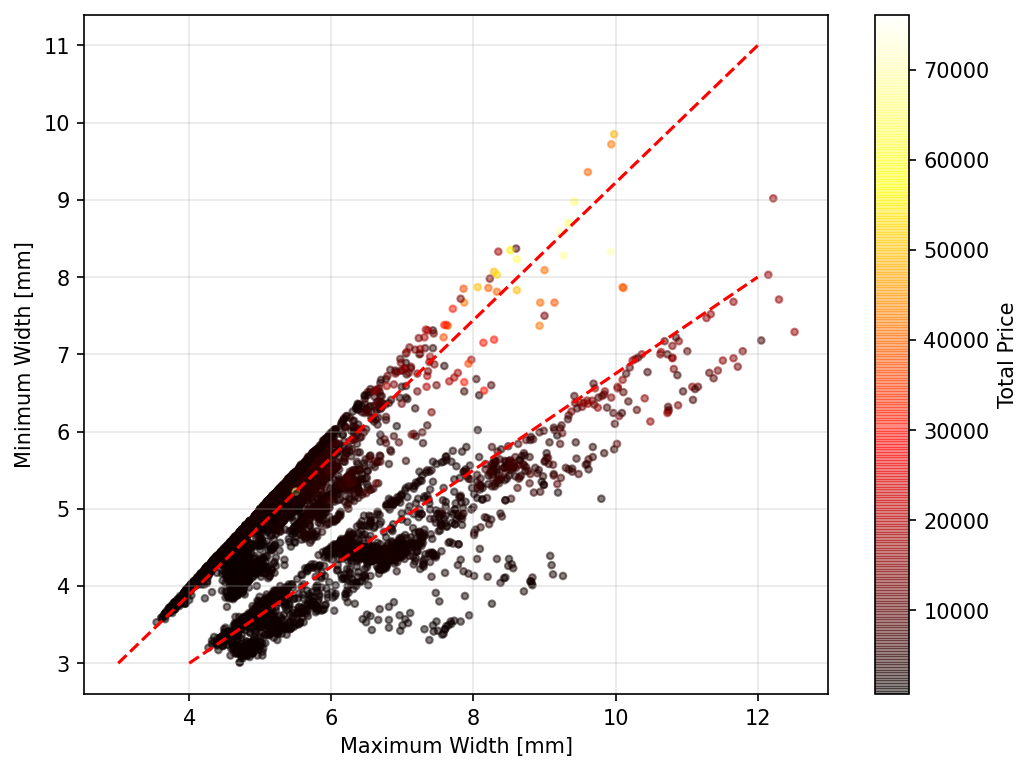

In [ ]:
# Define the data to be used
x = encoded.max_width
y = encoded.min_width
z = encoded.depth
c = encoded.Price

# Initialize the plot
plt.figure(figsize = (8,6), dpi = 150)

# Create the plot
plt.scatter(x,y,c = c, cmap = 'hot', s = 10, alpha = 0.5)

# Display the two general trends
# Obtained by eyeballing
plt.plot([3,12], [3,11], linestyle = '--', c = 'r')
plt.plot([4,12], [3,8], linestyle = '--', c = 'r')

# Groom the plot
plt.xlabel('Maximum Width [mm]' )
plt.ylabel('Minimum Width [mm]' )
plt.colorbar(label = 'Total Price')
plt.grid(alpha = 0.3)

## Price per Carat Distribution

Text(3464.12106832677, 0.0003, 'Average Price per Carat = 3500')

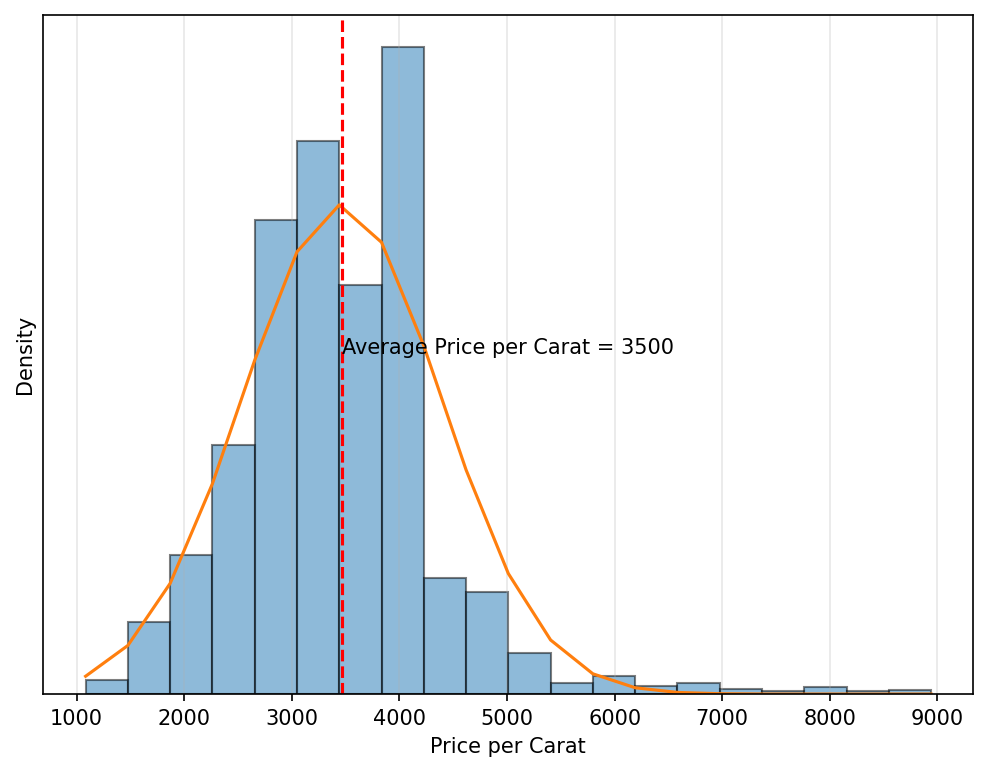

In [ ]:
import scipy

# remove the first and 100th percentile for the data
data = encoded.price_per_carat.loc[encoded.price_per_carat < encoded.price_per_carat.quantile(0.99)]

# Intialize the Plot
plt.figure(figsize = (8,6
                      ), dpi = 150)

# Define teh bins of the histogram
_, bins, _ = plt.hist(data, 20, density=1, alpha=0.5, edgecolor = 'k')
#encoded.price_per_carat.loc[encoded.price_per_carat < encoded.price_per_carat.quantile(0.99)].hist(bins = 20, edgecolor = 'k', alpha = 0.5)

# Display the approximate distribution/envelope
mu, sigma = scipy.stats.norm.fit(data)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)

# Groom the plot
plt.yticks([])
plt.grid(alpha = 0.3)
plt.xlabel('Price per Carat')
plt.ylabel('Density')
plt.axvline(data.mean(), c = 'r', linestyle = '--')
plt.text (data.mean(), 0.0003, f'Average Price per Carat = {round(data.mean(), -2):.0f}', )


## Total Price and Price per Carat vs Dimension Score
Using Principal Component Analysis, the physical dimensions and weight of the diamonds were reduced to a single variable and then plotted against the price. Using simple polynomial regression, the line of best fit was displayed.

In [ ]:
# Define the columns to be used
dims = encoded[['Weight', 'max_width', 'min_width', 'depth']]

# Import additional libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(dims)

# fit PCA
pca = PCA(n_components = 1)
dim_score = pca.fit_transform(scaled_df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[]

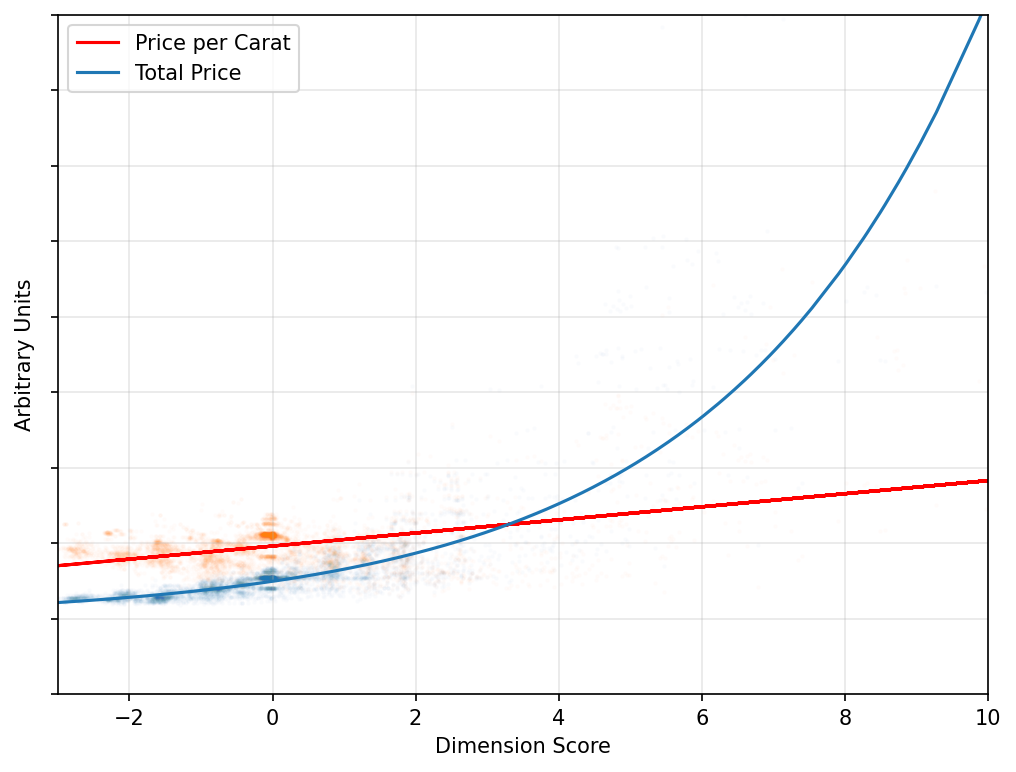

In [ ]:
# Initialize the plot
plt.figure(figsize = (8,6), dpi = 150)

# Create a scatter plot of the original data points
# low transparency
plt.scatter(dim_score, encoded.Price/encoded.Price.max(), s= 2,alpha = 0.01)
plt.scatter(dim_score, encoded.price_per_carat/encoded.price_per_carat.max(), s= 2, alpha = 0.01)

# Simple regression
# plot the resulting line
x = dim_score[:,0]
y = encoded.price_per_carat/encoded.price_per_carat.max()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c= 'red', label = 'Price per Carat')


# Simple regression
# plot the second resulting line
x = dim_score[:,0]
y = np.log(encoded.Price/encoded.Price.max())
m, b = np.polyfit(x, y, 1)
temp_df = pd.DataFrame()
temp_df['x'] = x
temp_df['y'] =  np.e**(m*x + b)
temp_df.sort_values(by = 'x', inplace = True)
plt.plot(temp_df.x, temp_df.y, label  = 'Total Price')


'''
x = dim_score[:,0]
y = encoded.Price/encoded.Price.max()


m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c= 'blue', label = 'Total Price')
plt.grid(alpha = 0.3)
plt.xticks()
'''
#plt.yticks(alpha = 0)
#plt.yaxis.set_ticklabels([])
#from matplotlib.ticker import NullFormatter
#plt.xaxis.set_major_formatter(NullFormatter())

# Groom the plot
plt.xlabel('Dimension Score')
plt.ylabel('Arbitrary Units')
plt.legend()
plt.ylim(-0.05,0.4)
plt.xlim(-3, 10)
plt.grid(alpha = 0.3)
plt.axes().set_yticklabels([])

Since we only want the general relationship between the variables, the y values are manipulated so that the two plots can be compared easily resulting to the y axis having arbitrary units.

## Pie Charts
Create pie charts for better visualization of the percent share of the different properties.

<Figure size 1200x900 with 0 Axes>

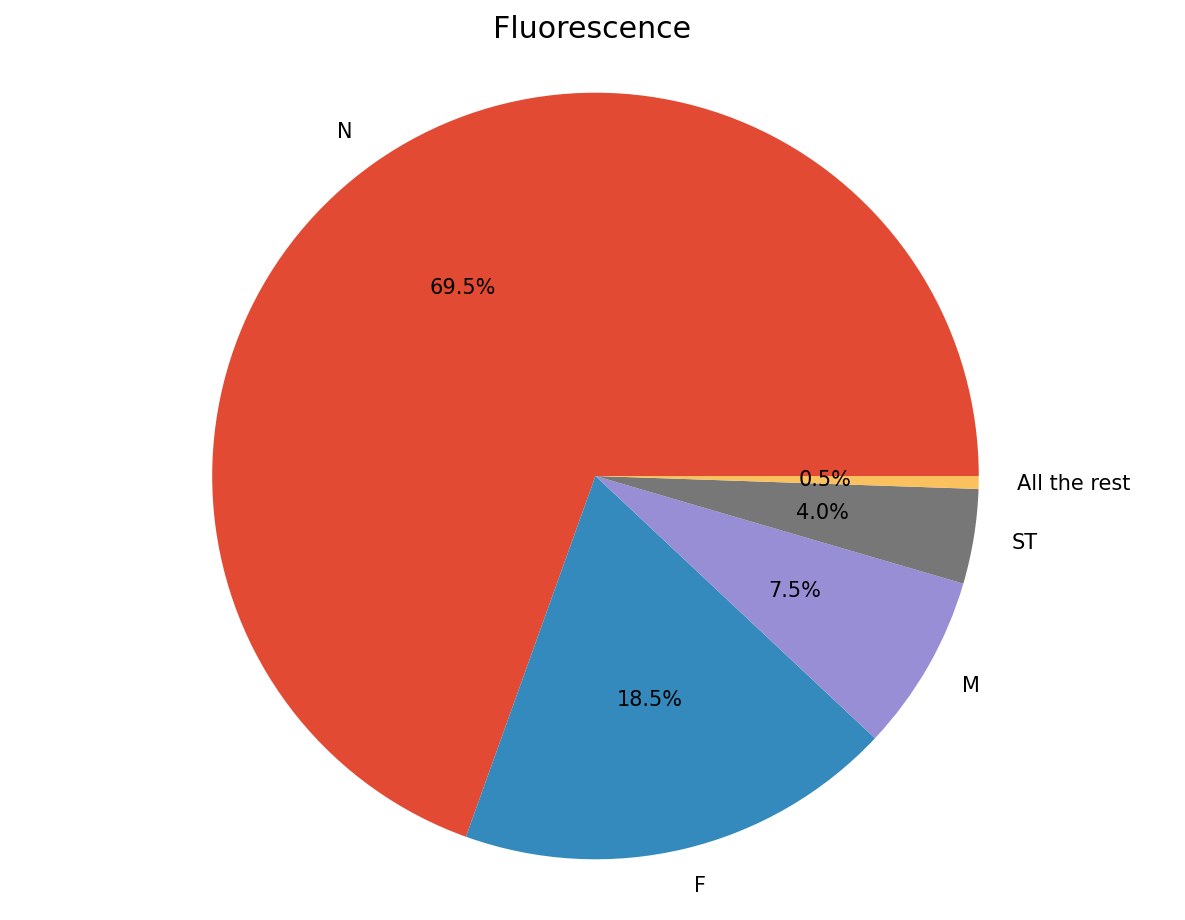

In [ ]:
plt.style.use('ggplot')

# Define the property where the chart will be generated from
properties = 'Fluorescence'

# Define the labels to be used
dic = dict(pre_processed[properties].value_counts())

# group together all elements in the dictionary whose value is less than 1%
# name this group 'All the rest'
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<0.01*(len(pre_processed))) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

# create the plot
plt.figure(figsize = (8,6), dpi = 150)
fig, ax = plt.subplots(figsize = (8,6), dpi = 150)

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.title(str(properties))
plt.show()

<Figure size 1200x900 with 0 Axes>

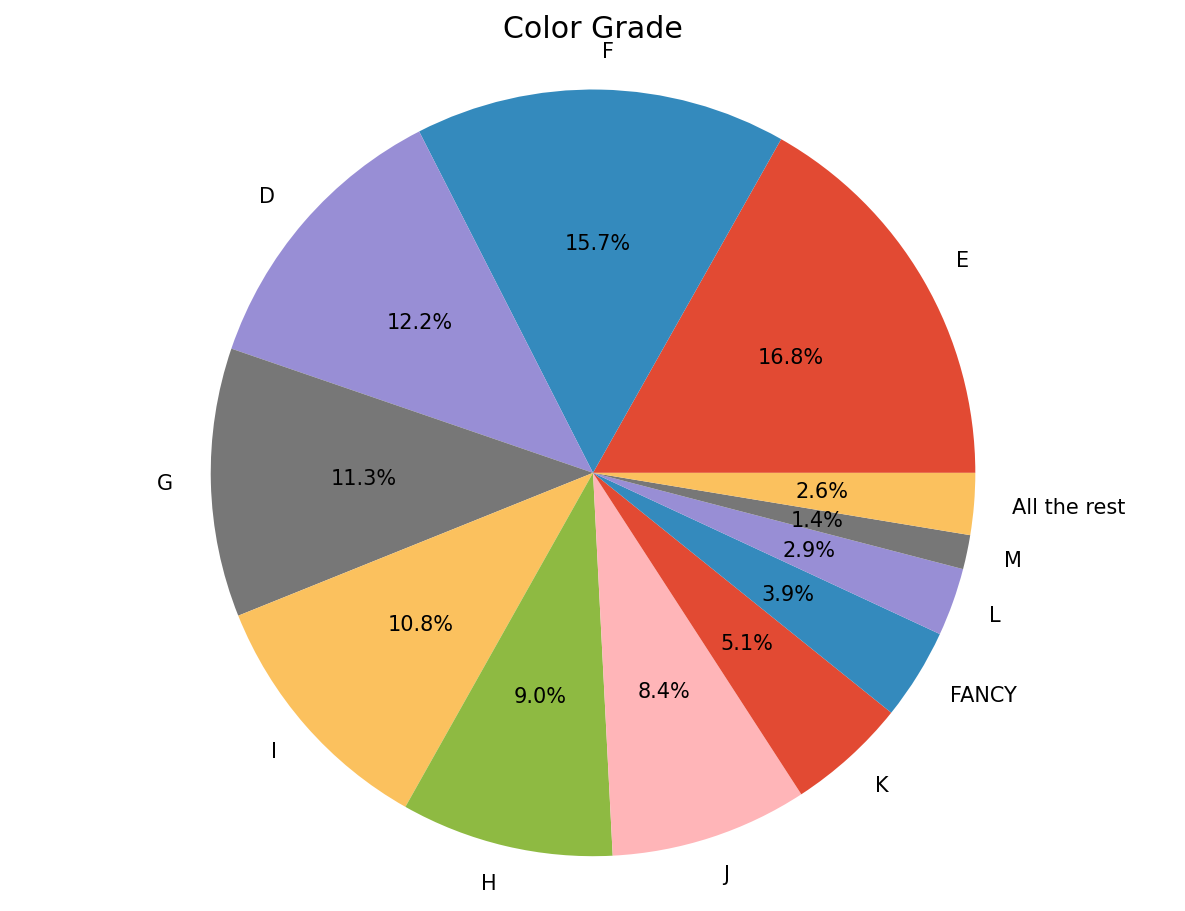

In [ ]:
plt.style.use('ggplot')

properties = 'color_grade'
dic = dict(pre_processed[properties].value_counts())

# group together all elements in the dictionary whose value is less than 1%
# name this group 'All the rest'
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<0.01*(len(pre_processed))) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

plt.figure(figsize = (8,6), dpi = 150)
fig, ax = plt.subplots(figsize = (8,6), dpi = 150)

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.title('Color Grade')
plt.show()

In [ ]:
pre_processed.columns

Index(['Id', 'Shape', 'Weight', 'Clarity', 'color_grade', 'Cut', 'Polish',
       'Symmetry', 'Fluorescence', 'Price', 'max_width', 'min_width', 'depth',
       'price_per_carat'],
      dtype='object')

<Figure size 1200x900 with 0 Axes>

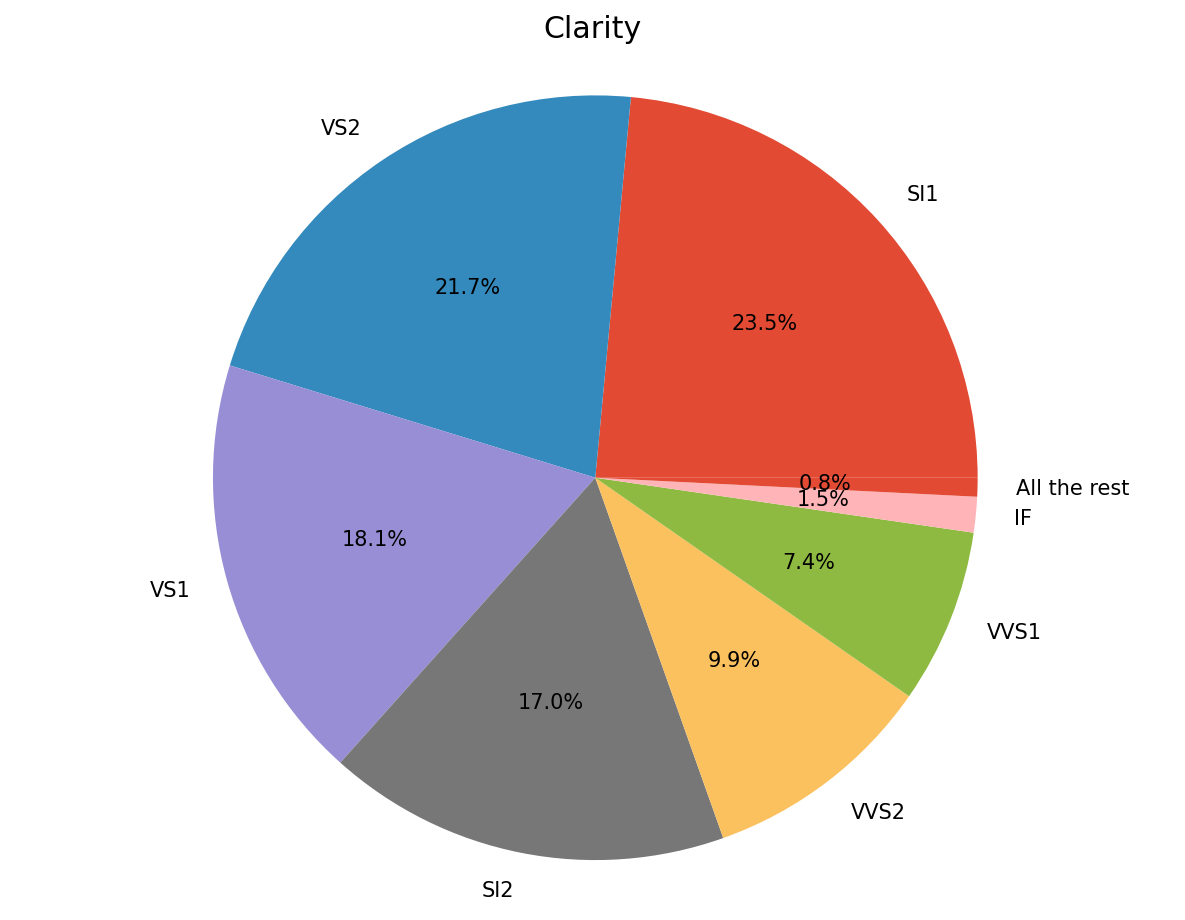

In [ ]:
plt.style.use('ggplot')

properties = 'Clarity'
dic = dict(pre_processed[properties].value_counts())

# group together all elements in the dictionary whose value is less than 1%
# name this group 'All the rest'
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<0.01*(len(pre_processed))) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

plt.figure(figsize = (8,6), dpi = 150)
fig, ax = plt.subplots(figsize = (8,6), dpi = 150)

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.title(str(properties))
plt.show()

<Figure size 1200x900 with 0 Axes>

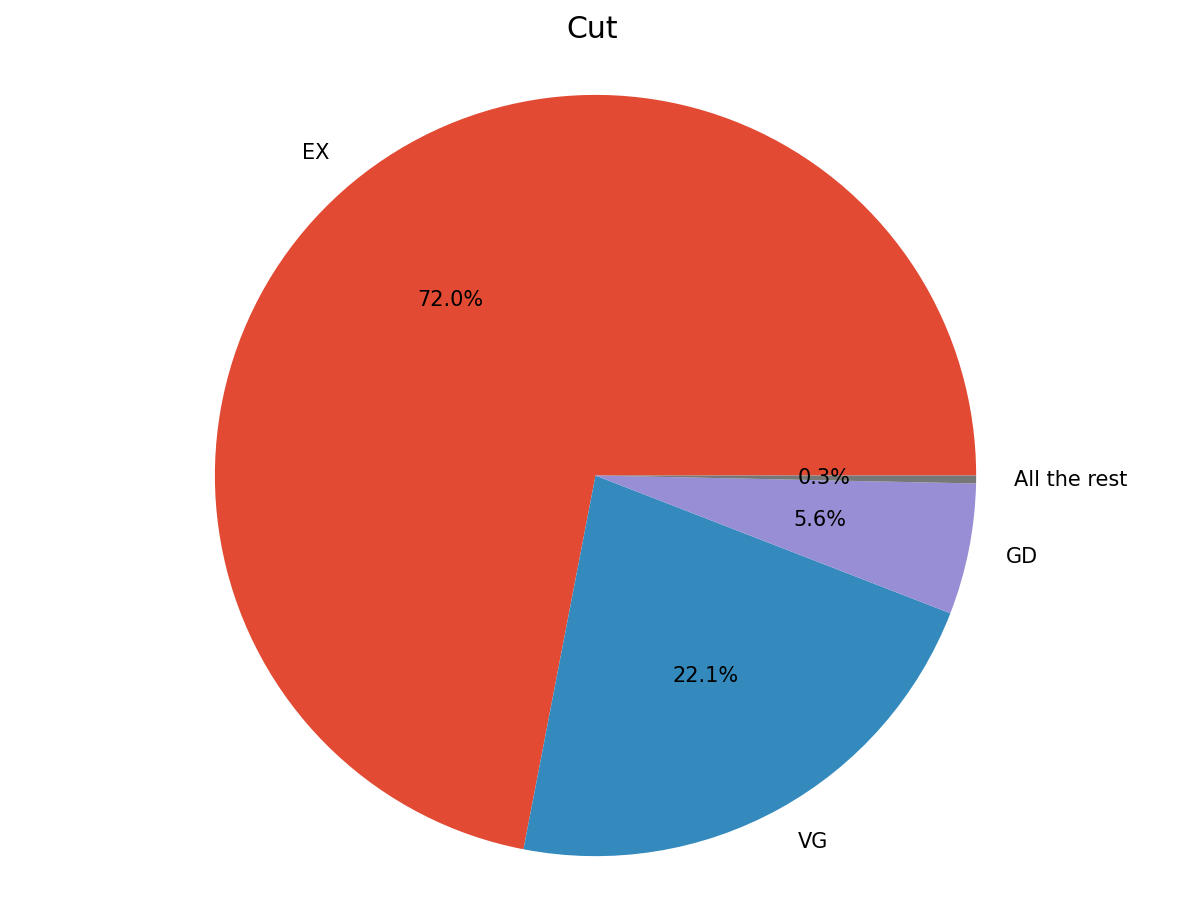

In [ ]:
plt.style.use('ggplot')

properties = 'Cut'
dic = dict(pre_processed[properties].value_counts())

# group together all elements in the dictionary whose value is less than 1%
# name this group 'All the rest'
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<0.01*(len(pre_processed))) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

plt.figure(figsize = (8,6), dpi = 150)
fig, ax = plt.subplots(figsize = (8,6), dpi = 150)

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.title(str(properties))
plt.show()

<Figure size 1200x900 with 0 Axes>

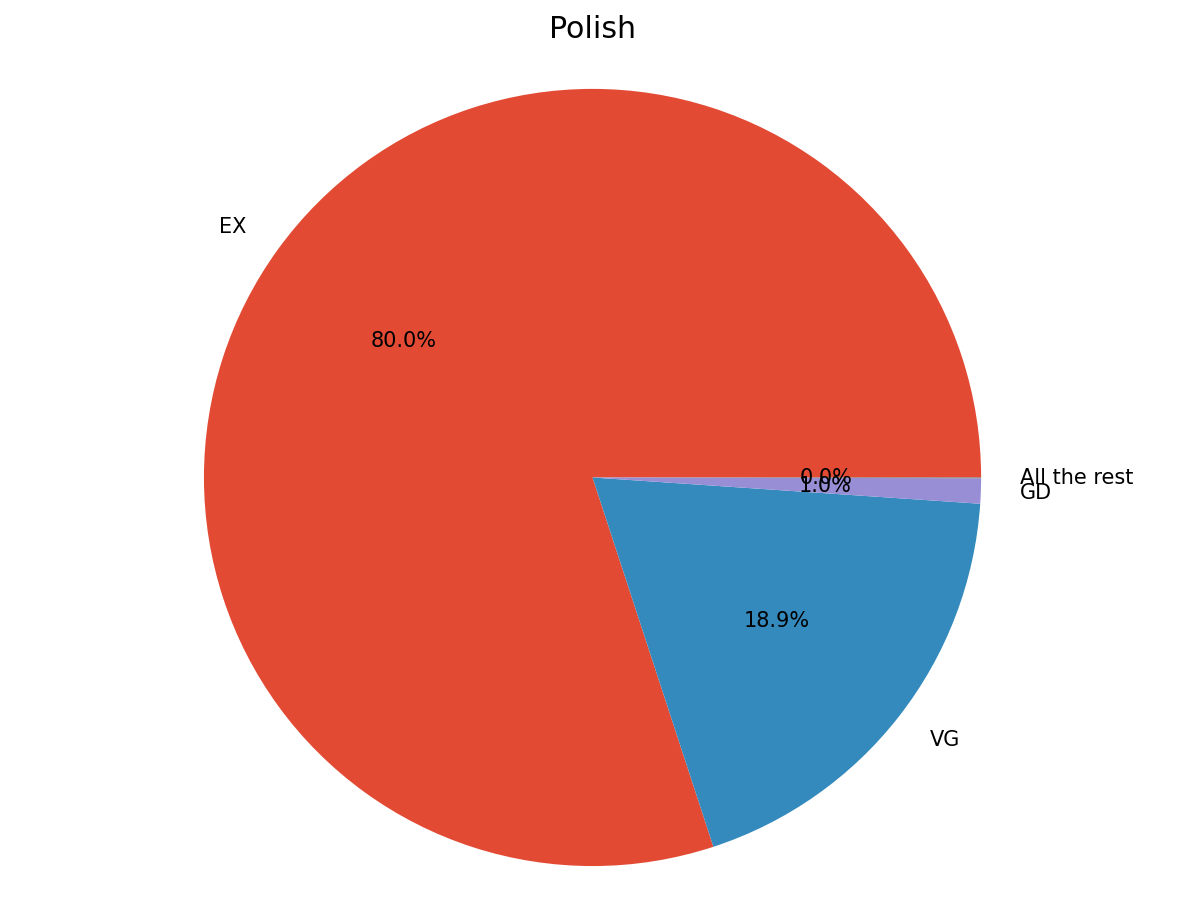

In [ ]:
plt.style.use('ggplot')

properties = 'Polish'
dic = dict(pre_processed[properties].value_counts())

# group together all elements in the dictionary whose value is less than 1%
# name this group 'All the rest'
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<0.01*(len(pre_processed))) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

plt.figure(figsize = (8,6), dpi = 150)
fig, ax = plt.subplots(figsize = (8,6), dpi = 150)

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.title(str(properties))
plt.show()

<Figure size 1200x900 with 0 Axes>

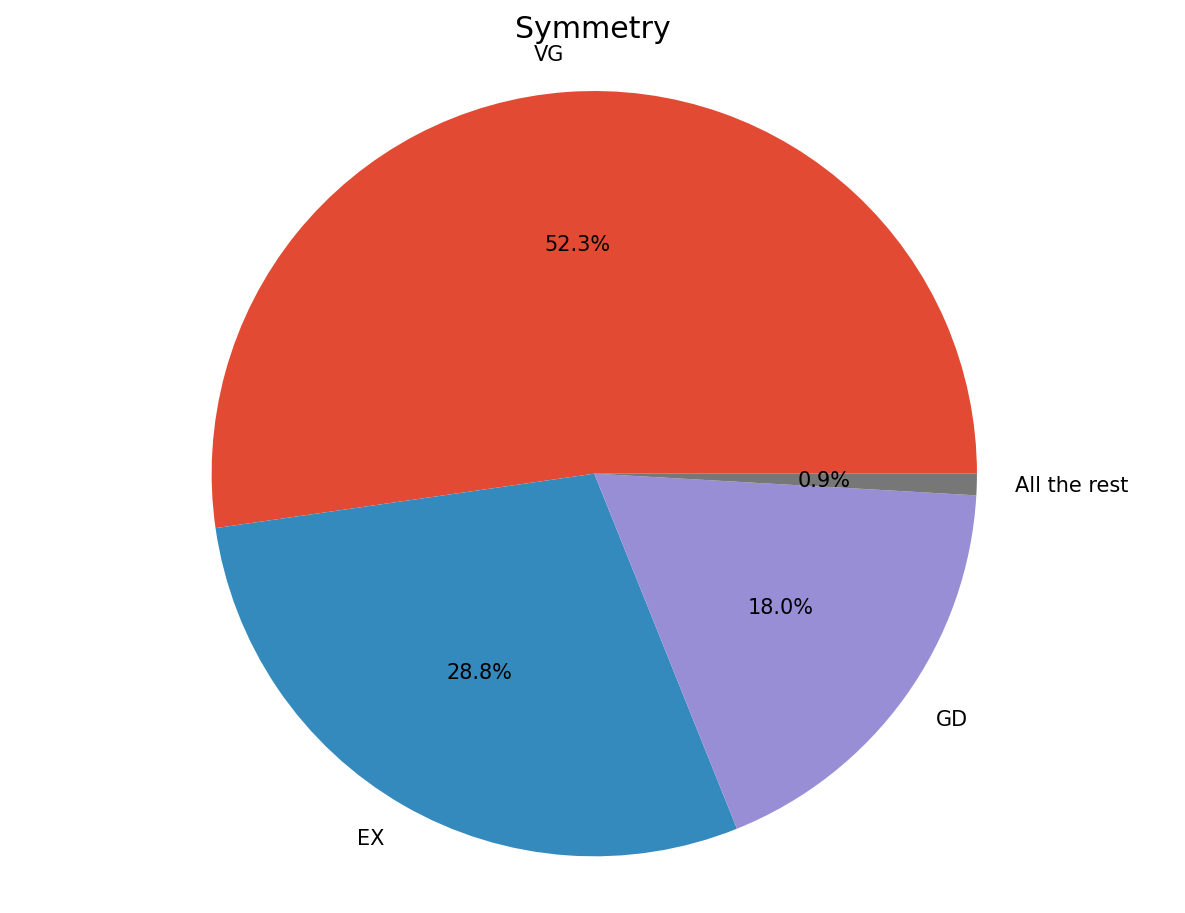

In [ ]:
plt.style.use('ggplot')

properties = 'Symmetry'
dic = dict(pre_processed[properties].value_counts())

# group together all elements in the dictionary whose value is less than 1%
# name this group 'All the rest'
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<0.01*(len(pre_processed))) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

plt.figure(figsize = (8,6), dpi = 150)
fig, ax = plt.subplots(figsize = (8,6), dpi = 150)

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.title(str(properties))
plt.show()

## Compare Price with External Data
External data is obtained from https://www.diamonds.pro/education/lab-created-diamonds-prices-value/

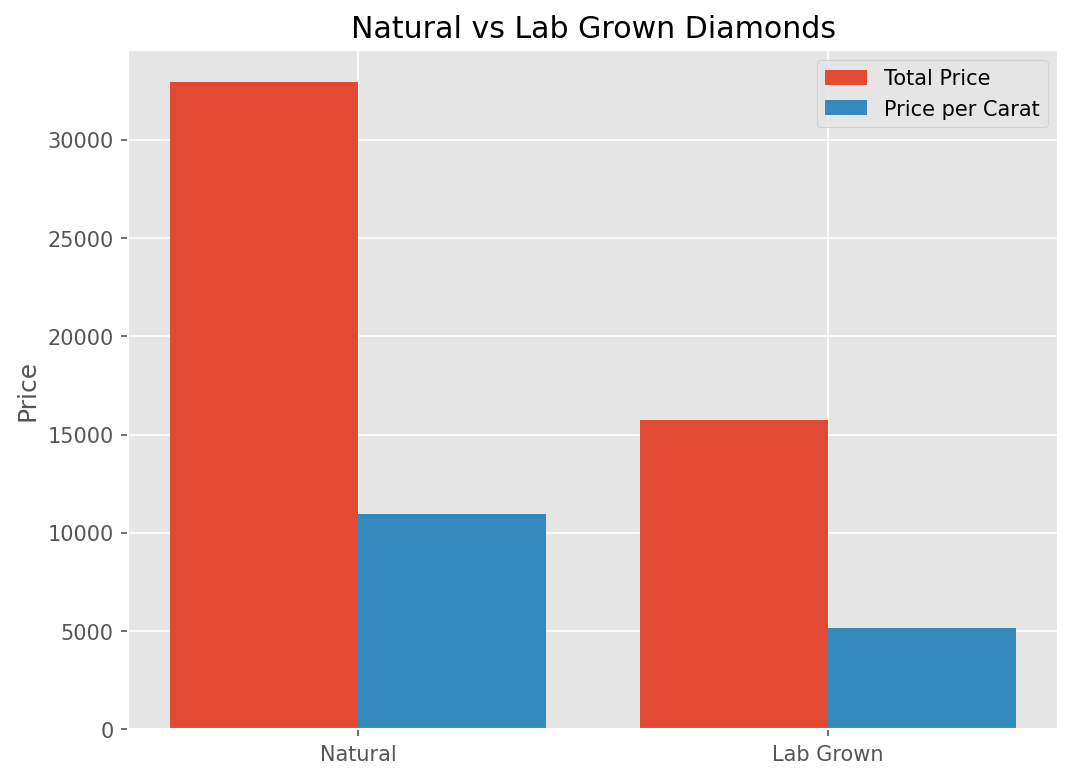

In [ ]:
# Manually define teh variables from external data
plt.figure(figsize = (8,6), dpi = 150)
X = ['Natural', 'Lab Grown']
Ygirls = [32930, 15750]
Zboys = [32930/3, 15750/3.05]  
X_axis = np.arange(len(X))

# Create the plot
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Total Price')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Price per Carat')


# Groom the plot
plt.xticks(X_axis, X)
#plt.xlabel("Groups")
plt.ylabel('Price')
plt.title('Natural vs Lab Grown Diamonds')
plt.legend()
plt.show()